# پروژه نهایی تحلیل داده 

## معرفی پروژه
برای پروژه نهایی قرار است که با مجموعه داده سرشماری بزرگسالان ایالات متحده آمریکا کار کنم که در آن درآمد را به عوامل اجتماعی از جمله سن، تحصیلات، وضعیت تاهل، نژاد، جنسیت و چند مورد دیگر مرتبط می کند. مجموعه داده ها از رپیزوتری دانشگاه کالیفرنیا، ایروین به دست آمده است.با این که داده ها قدیمی هستند اما مهم است که ببینیم چگونه عوامل اجتماعی که به درآمد کمک می کنند و در صورت انتشار داده های جدید میتوان بررسی کرد که چطور در طول سال ها تاثیرات این عوامل تغییر کرده اند. به این ترتیب ما می توانیم متوجه شویم که آیا پیشرفتی در پر کردن شکاف درآمدی بر اساس این عوامل صورت گرفته است یا خیر؟

## دیتا
فایل اول شامل 32561 ردیف و فایل دوم با نام تست شامل 16281 ردیف است. برای اهداف تحلیلی ما از فایل اول استفاده میشود و در نهایت سعی میکنم مدلی ارائه کنم که بتواند با توجه به ویژگی های اجتماعی درآمد افراد را پیشبینی کند برای بررسی دقت مدل از دیتای دوم برای دقت سنجی مدل استفاده خواهد شد.
برخی از نقاط در داده های ما مقدار ندارد که این موارد متناسب با شرایط حذف یا با توجه به شرایط مقداری برای آن ها در نظر گرفته خواهد شد.

## سوالات تحقیق
1.	آیا شکاف‌های درآمدی بر اساس عوامل اجتماعی (جنسیت، نژاد، سن، وضعیت تأهل و تحصیلات) وجود دارد؟
* بر اساس دانش فعلی، انتظار می‌رود که شکاف‌های درآمدی بر اساس عوامل اجتماعی وجود داشته باشد هرچند این موضوع باید با استفاده از داده‌ها ثابت شود.
2.	کدام عامل اجتماعی بزرگ‌ترین تعیین‌کننده درآمد است؟
* بدون دانش قبلی، انتظار می‌رود که تحصیلات بیشترین تأثیر را بر درآمد داشته باشد.
3.	آیا می‌توانیم با داشتن مجموعه‌ای از عوامل اجتماعی پیش‌بینی کنیم که درآمد فرد بیش از 50 هزار دلار یا کمتر خواهد بود؟
* بله، انتظار دارم بتوانیم طبقه‌بندی درآمد فرد را پیش‌بینی کنیم. به‌طور تقریبی انتظار دارم دقت این پیش‌بینی ممکن است بیشتر از 75 درصد باشد.
4.	با نادیده گرفتن درآمد، چه عواملی به شدت با یکدیگر همبستگی دارند؟
* به نظر می‌رسد که تحصیلات بیشترین تأثیر را بر درآمد دارد، اما احتمالاً تحصیلات با سایر عوامل نیز همبستگی بالایی دارد. پیش‌بینی می‌شود که بیشترین همبستگی بین تحصیلات و نژاد باشد.
5.	چگونه وضعیت تأهل بر توزیع درآمد تأثیر می‌گذارد؟
* انتظار میرود که افراد متاهل به طور کلی دارای درآمد بیشتری نسبت به افراد مجرد داشته باشند.
6.	آیا جنسیت و نژاد به طور همزمان بر درآمد تأثیر می‌گذارند؟
* تحلیل تأثیر همزمان این دو عامل می‌تواند به شناسایی نابرابری‌های کمک کند. انتظار میرود که هردوی این عوامل بر درآمد افراد تاثیرگذار باشند.
7.	آیا سطح تحصیلات با نوع شغل همبستگی دارد؟
*  می‌توانیم بررسی کنیم که آیا افراد با تحصیلات بالاتر در مشاغل تخصصی یا مدیریتی قرار دارند.
8.	آیا ساعات کاری هفتگی بر درآمد تأثیر می‌گذارد؟
*  این سوال می‌تواند رابطه بین زمان کاری و سطح درآمد را تحلیل کند انتظار میرود که رابطه مستقیمی بین ساعت کاری و درآمد افراد مشاهده شود.
9.	چه تفاوت‌هایی در توزیع درآمد بین مردان و زنان با سطح تحصیلات مشابه وجود دارد؟
*  این سوال بررسی می‌کند که آیا با داشتن تحصیلات مشابه، درآمد زنان و مردان همچنان متفاوت است یا خیر.




In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures


In [2]:
data = pd.read_csv('census.csv')
data.head()

,age,workclass,final weight,education,education num,marital-status,occupation,relationship,race,sex,Unnamed: 10,Unnamed: 11,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


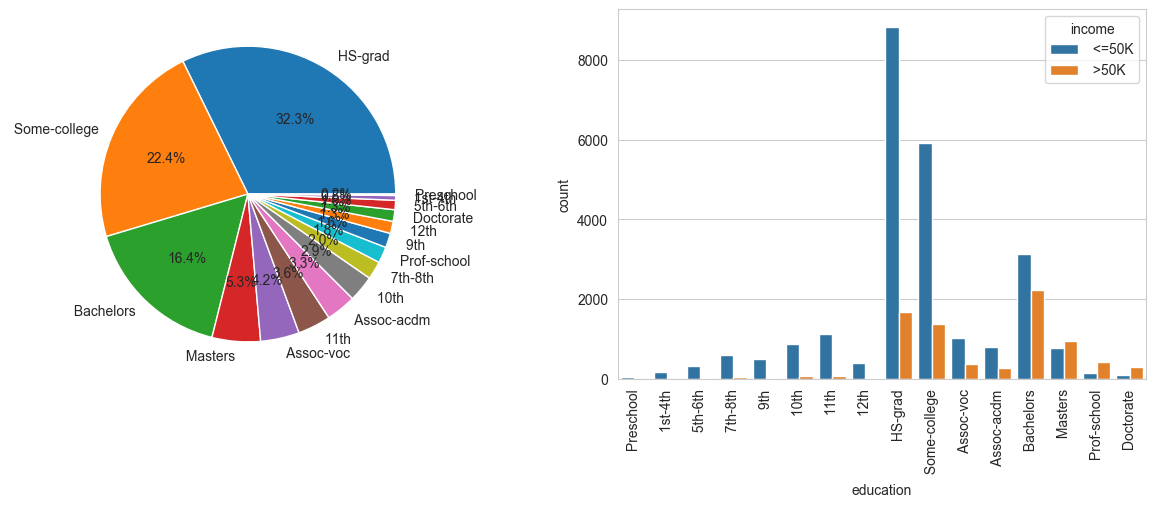

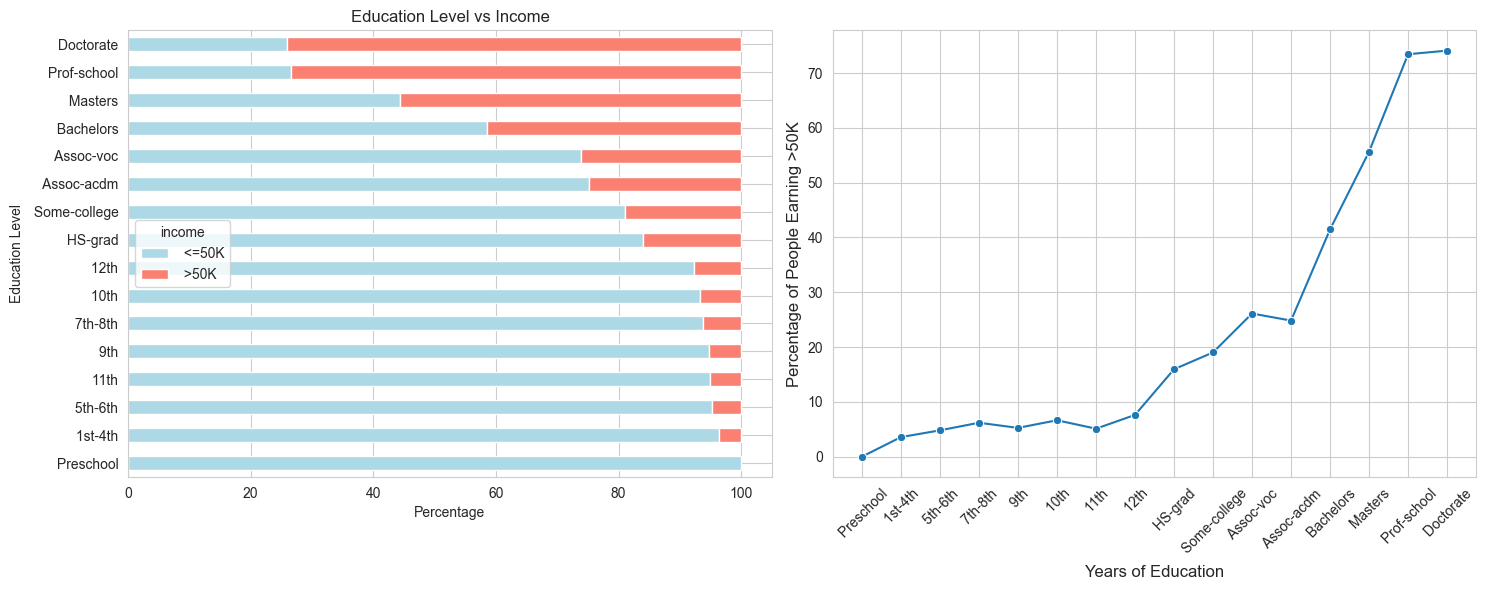

In [3]:
edu = data['education'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)
data['education'].value_counts().sort_values()
education = data.groupby('education')['education num'].unique().sort_values()
index_list = education.index.to_list()
sns.countplot(x="education", hue='income', data=data, order=index_list)
ax1.pie(edu, labels=edu.index.to_list(), autopct='%1.1f%%')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
education_income = pd.crosstab(data['education'], data['income'], normalize='index') * 100
education_income.sort_values(by=' >50K').plot(kind='barh', stacked=True, color=['lightblue', 'salmon'], ax=plt.gca())
plt.xlabel('Percentage')
plt.ylabel('Education Level')
plt.title('Education Level vs Income')

plt.subplot(1, 2, 2)
data['income_numeric'] = data['income'].apply(lambda x: 1 if x == ' >50K' else 0)
education_income_mean = data.groupby('education num')['income_numeric'].mean() * 100
sns.lineplot(x=index_list, y=education_income_mean.values, marker='o')
plt.xlabel('Years of Education', fontsize=12)
plt.ylabel('Percentage of People Earning >50K', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

* همانطور که مشاهده میشود بیشتر جامعه را فارغ التحصیلان دبیرستان و کالج تشکیل میدهند همچنین نسبت افراد با درامد بیشتر از پنجاه هزار دلار با افزایش تحصیلات بیشتر میشود به صورتی که در گروه افراد با مدرک بالاتر از لیسانس تعداد افراد با درامد بیش از پنجاه هزار دلار بیشتر از افرادی با درآمد کمتر از این میزان هستند. بیشترین شیب نمودار افزایش درآمد از مقطع لیسانس تا دکترا مشاهده میشود بنابرین میتوان برداشت کرد که با دریافت مدرک لیسانس و ادامه تحصیل  بیشترین شانس را برای افزایش درآمد به بیش از 50هزار دلار خواهیم داشت هرچند با دریافت مدرک دکترا تغییر معناداری در افزایش درآمد به بیش از پنجاه هزار دلار مشاهده نمیشود.

In [4]:
data['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

* در فیلد طبقه بندی کارها 1893 مورد با عنوان ؟ ثبت شده اند و دیتایی برای آن ها وجود ندارد از آنجایی که پایتون ؟ را به عنوان دیتای گم شده تشخیص نمیدهد ابتدا این مقدار را جایگزین میکنیم


In [5]:
data['workclass'] = np.where(data['workclass'] == ' ?', np.NaN, data['workclass'])

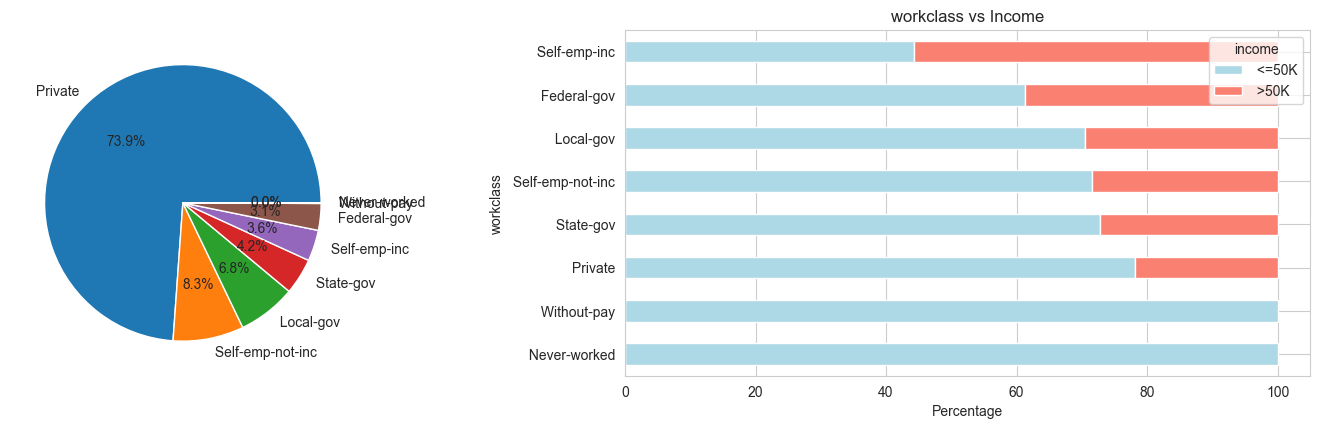

In [6]:
workcls = data['workclass'].value_counts()
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.pie(workcls, labels=workcls.index, autopct='%1.1f%%')

plt.subplot(2, 2, 2)
workcls_income = pd.crosstab(data['workclass'], data['income'], normalize='index') * 100
workcls_income.sort_values(by=' >50K').plot(kind='barh', stacked=True, color=['lightblue', 'salmon'], ax=plt.gca())
plt.xlabel('Percentage')
plt.ylabel('workclass')
plt.title('workclass vs Income')
plt.tight_layout()

plt.show()

* بزرگترین گروه شغلی در جامعه آماری ما متعلق به کارکنان خصوصی میباشد هرچند این گروه مطابق با انتظار کمترین نسبت را در درامدهای بالای پنجاه هزار دلار دارند به طور نسبی بیشترین درآمد متعلق به دسته خویش فرمایان با ثبت شرکت تعلق دارد هرچند این گروه کوچکترین بخش جامعه کارکنان ما را تشکیل میدهند اما بیشتر اعضای این گروه درآمد بالای پنجاه هزار دلار دارند پس از این گروه کارمندان دولت فدرال توانسته اند بهترین عملکرد درآمدی را داشته باشند.




In [7]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

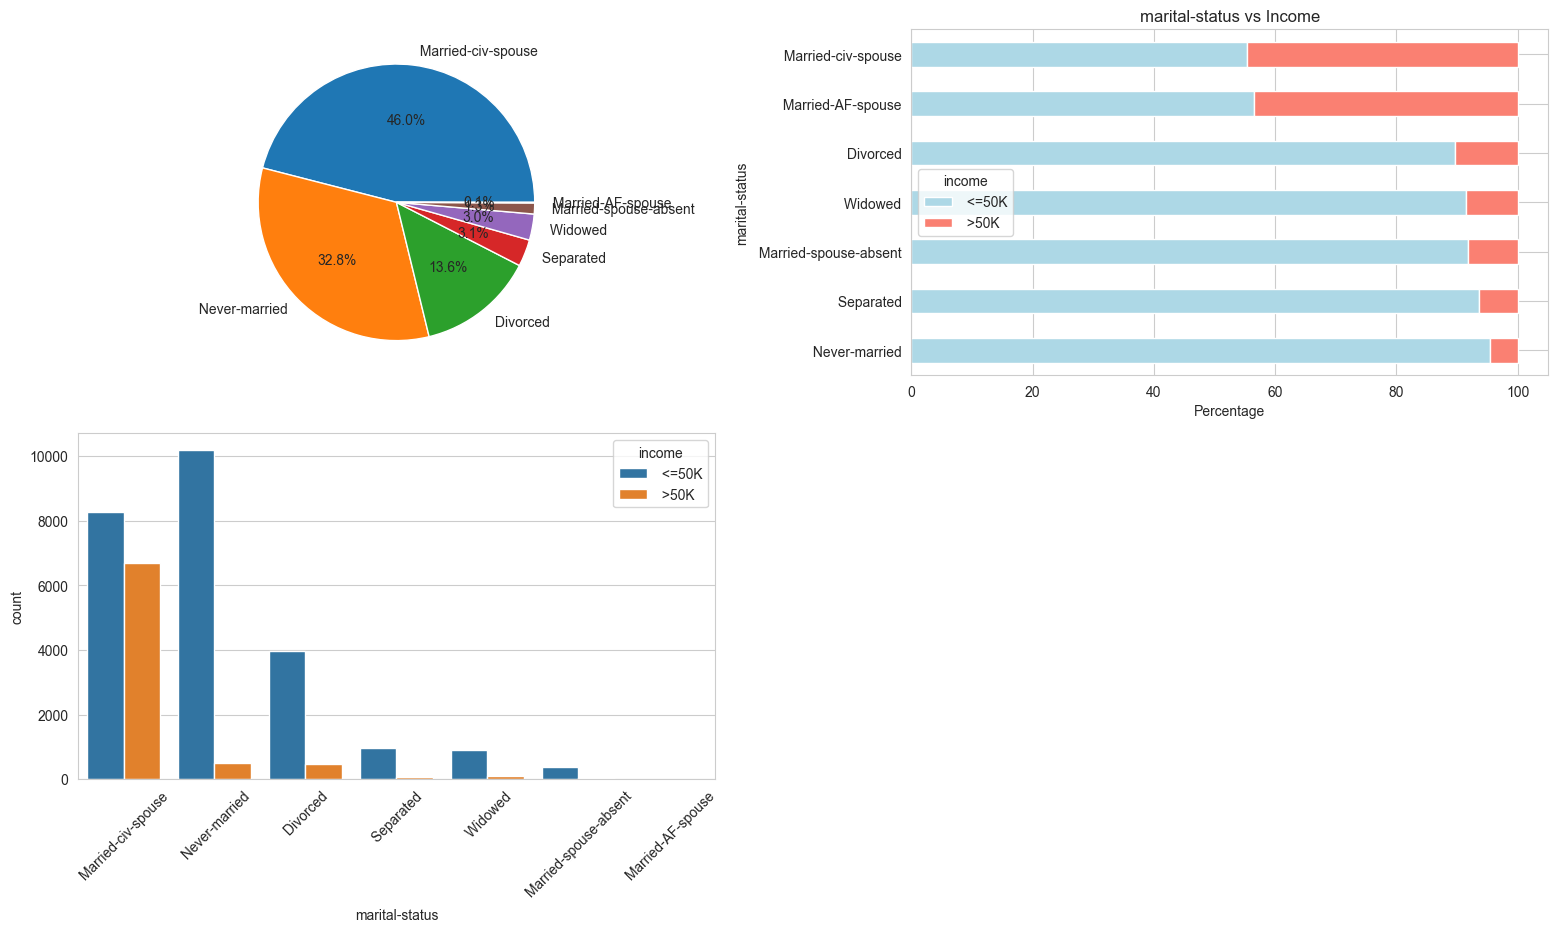

In [8]:
marital_status = data['marital-status'].value_counts()
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.pie(marital_status, labels=marital_status.index, autopct='%1.1f%%')

plt.subplot(2, 2, 2)
marital_status_income = pd.crosstab(data['marital-status'], data['income'], normalize='index') * 100
marital_status_income.sort_values(by=' >50K').plot(kind='barh', stacked=True, color=['lightblue', 'salmon'],
                                                   ax=plt.gca())
plt.xlabel('Percentage')
plt.ylabel('marital-status')
plt.title('marital-status vs Income')
plt.tight_layout()

plt.subplot(2, 2, 3)
data['marital-status'].value_counts().sort_values()
index_list = marital_status.index.to_list()
sns.countplot(x="marital-status", hue='income', data=data, order=index_list)
plt.xticks(rotation=45)

plt.show()

* افراد ازدواج کرده و افرادی که هرگز ازدواج نکرده اند دو گروه بزرگ جامعه آماری را تشکیل میدهند هرچند سطح درآمد به صورت میانگین در گروه ازدواج کرده ها بسیار بیشتر میباشد به صورتی که در حدود 50درصد افراد ازدواج کرده درآمدی بیشتر از پنجاه هزار دلار دارند در حالی که این عدد برای افراد مجرد در حدود 10درصد میباشد. 

* وضعیت تأهل می‌تواند با عواملی مانند سن، تحصیلات، و وضعیت شغلی همبستگی داشته باشد همچنین ممکن است افرادی که در مراحل باثبات‌تر زندگی قرار داشته و تحصیلات بالاتر و موقعیت شغلی مناسبی دارند بیشتر میل به ازدواج داشته و به همین دلیل افراد حاضر در این گروه درامد بیشتری دارند.
اکثرگروه‌ جداشده و طلاق گرفته درآمد زیر پنجاه هزار دلار دارند. این ممکن است به دلیل تأثیرات منفی جدایی و طلاق بر وضعیت اقتصادی فرد باشد، از جمله تقسیم منابع، هزینه‌های قانونی باشد همچنین میتوان وضعیت بد اقتصادی را به عنوان یکی از عوامل جدایی در نظر گرفت.

* در مجموع، به نظر می‌رسد که وضعیت تاهل تاثیر زیادی بر درآمد دارد و این موضوع به یک شکاف اقتصادی بین گروه‌های مختلف منجر شده. افراد متاهل و برخی گروه‌های خاص (مثل همسران نظامی) شرایط اقتصادی بهتری دارند، در حالی که افراد مجرد، جداشده، طلاق ‌گرفته یا بیوه بیشتر با درآمدهای کمتر روبه‌رو هستند.


In [9]:
data['race'].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

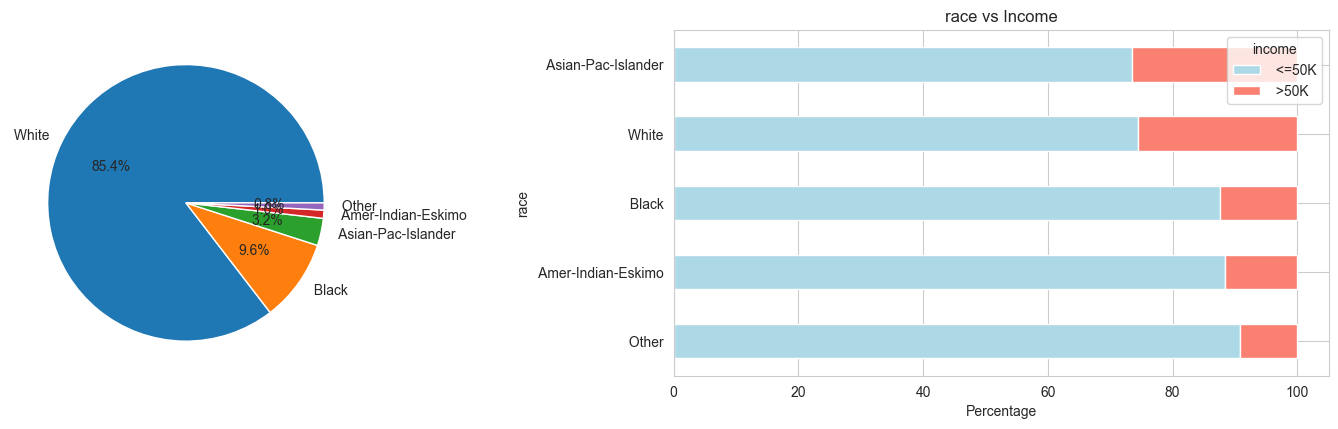

In [10]:
race = data['race'].value_counts()
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.pie(race, labels=race.index, autopct='%1.1f%%')

plt.subplot(2, 2, 2)
relationship_status_income = pd.crosstab(data['race'], data['income'], normalize='index') * 100
relationship_status_income.sort_values(by=' >50K').plot(kind='barh', stacked=True, color=['lightblue', 'salmon'],
                                                        ax=plt.gca())
plt.xlabel('Percentage')
plt.ylabel('race')
plt.title('race vs Income')
plt.tight_layout()

plt.show()

* اکثریت بزرگی از افراد جامعه آماری ما سفید پوست هستند به همین دلیل، بسیاری از الگوهای درآمدی که در جامعه مشاهده می‌شود احتمالاً به ‌طور عمده توسط افراد سفید پوست تعیین می‌شود

* گروه آسیایی  نسبت به سایر نژادها حتی افراد سفیدپوست درصد بالاتری از افراد با درآمد بالای ۵۰ هزار دلار دارند که این می‌تواند نشان ‌دهنده دسترسی بهتر به فرصت‌های اقتصادی یا تحصیلات بالاتر در این گروه باشد.

* تفاوت‌های موجود بین گروه‌های نژادی ممکن است ناشی از عوامل مختلفی مانند سطح تحصیلات، دسترسی به فرصت‌ های شغلی، تبعیض اجتماعی و اقتصادی باشد که در طول زمان باعث شکل‌ گیری این الگوهای درآمدی شده‌اند.


In [11]:
data['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

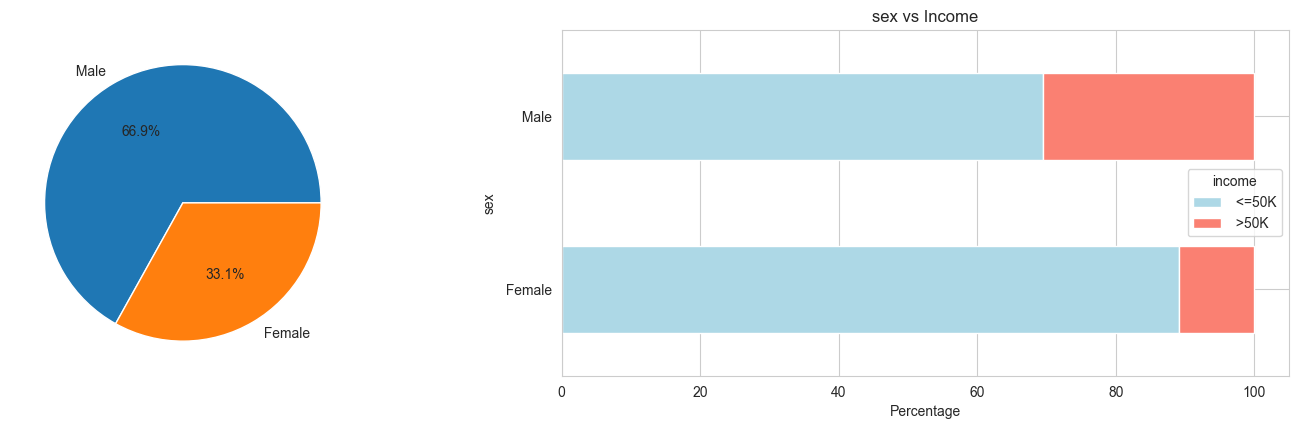

In [12]:
race = data['sex'].value_counts()
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.pie(race, labels=race.index, autopct='%1.1f%%')

plt.subplot(2, 2, 2)
relationship_status_income = pd.crosstab(data['sex'], data['income'], normalize='index') * 100
relationship_status_income.sort_values(by=' >50K').plot(kind='barh', stacked=True, color=['lightblue', 'salmon'],
                                                        ax=plt.gca())
plt.xlabel('Percentage')
plt.ylabel('sex')
plt.title('sex vs Income')
plt.tight_layout()

plt.show()

* بیشتر جامعه آماری ما در این مورد را مردان تشکیل میدهند همچنین درصد مردانی که درآمد بالای 50هزار دلار دارند 2برابر زنان این گروه میباشد که بیانگر شکاف بزرگی در این زمینه هست. هرچند ممکن است جنسیت تنها دلیل کمتر بودن درآمد گروه زنان نباشد و به صورت کلی عواملی مانند تحصیلات نیز بر آن تاثیرگذار بوده باشد ولی در این صورت نیز نشان دهنده این خواهد بود که زنان مورد تبعیض های اجتماعی ای قرار گرفته اند که اکنون موقعیت های شغلی بادرآمد بالای کمتری در اختیار آن ها قرار میگیرد.

In [14]:
data['hours-per-week'].value_counts()

hours-per-week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: count, Length: 94, dtype: int64

Accuracy of Ridge Logistic Regression Model: 0.76


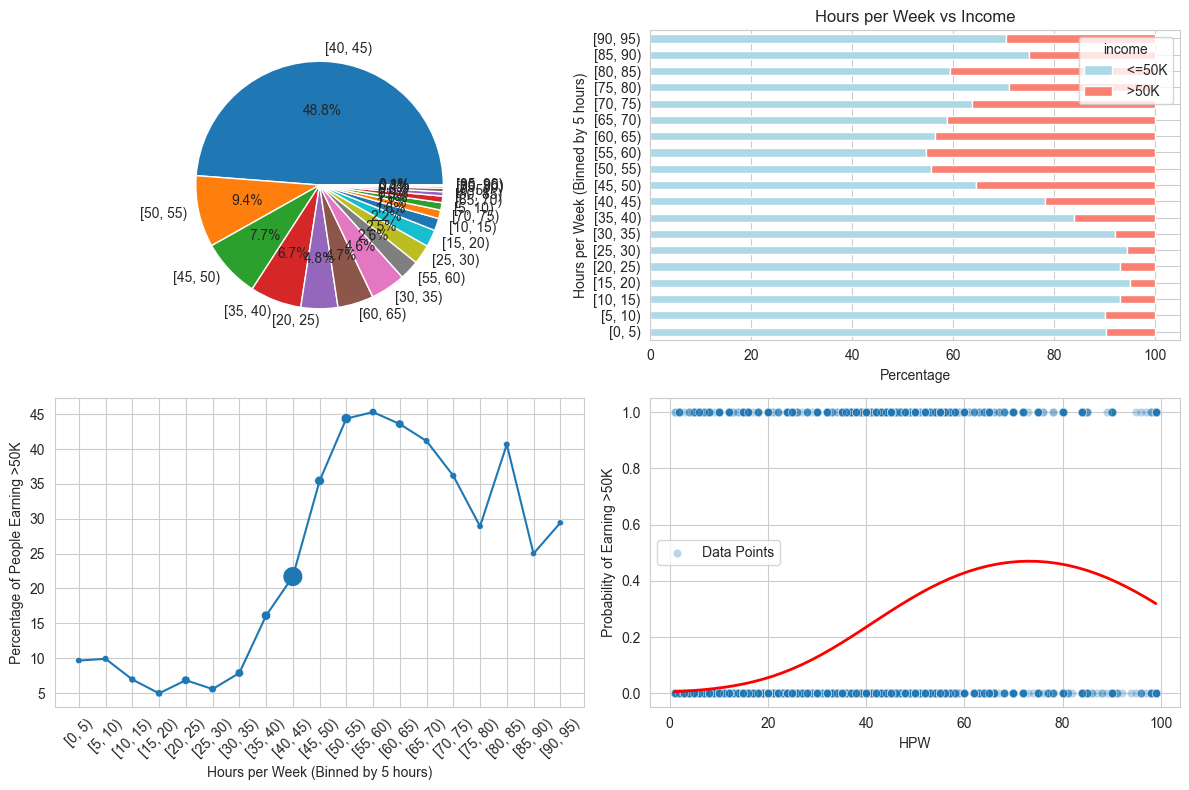

In [31]:
hpw = data['hours-per-week'].value_counts()
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
data['hours_bin'] = pd.cut(data['hours-per-week'], bins=np.arange(0, 100, 5), right=False)
hours_count = data['hours_bin'].value_counts()
plt.pie(hours_count, labels=hours_count.index, autopct='%1.1f%%')

plt.subplot(2, 2, 2)
hours_income = pd.crosstab(data['hours_bin'], data['income'], normalize='index') * 100
hours_income = hours_income.sort_index()
hours_income.plot(kind='barh', stacked=True, color=['lightblue', 'salmon'], ax=plt.gca())
plt.xlabel('Percentage')
plt.ylabel('Hours per Week (Binned by 5 hours)')
plt.title('Hours per Week vs Income')

plt.subplot(2, 2, 3)
hours_income_mean = data.groupby('hours_bin', observed=True)['income_numeric'].mean() * 100
hours_count = data['hours_bin'].value_counts().sort_index()
sns.scatterplot(x=hours_income_mean.index.astype(str), y=hours_income_mean.values,
                size=hours_count, sizes=(20, 200), legend=False, marker='o')
sns.lineplot(x=hours_income_mean.index.astype(str), y=hours_income_mean.values)
plt.xticks(rotation=45)
plt.xlabel('Hours per Week (Binned by 5 hours)')
plt.ylabel('Percentage of People Earning >50K')


plt.subplot(2, 2, 4)
X = data['hours-per-week'].values
X = X.reshape(-1, 1)
y = data['income_numeric'].values

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

hours_range = np.linspace(data['hours-per-week'].min(), data['hours-per-week'].max()).reshape(-1, 1)
hours_range_poly = poly.transform(hours_range)
hours_range_scaled = scaler.transform(hours_range_poly)
probabilities_poly = model.predict_proba(hours_range_scaled)[:,1]
accuracy_ridge = accuracy_score(y_test, y_pred)
print(f'Accuracy of Ridge Logistic Regression Model: {accuracy_ridge:.2f}')

sns.scatterplot(x='hours-per-week', y='income_numeric', data=data, alpha=0.3, label='Data Points')
plt.plot(hours_range, probabilities_poly, color='red', linewidth=2)
plt.xlabel('HPW')
plt.ylabel('Probability of Earning >50K')


plt.tight_layout()
plt.show()

* مطابق نمودار اول میتوان دریافت که تقریبا نیمی از افراد جامعه بین 40 تا45 ساعت در هفته معادل روزانه 9ساعت (بدون در نظر گرفتن دو روز تعطیل) کار میکنند. اکثریت جامعه (تقریبا 75درصد) در بازه ساعت کاری استاندارد یعنی 35تا55 ساعت در هفته کار میکنند.

* بیشترین درصد افراد با درآمد بالای 50هزار دلار در گروه 55تا60 ساعت کار در هفته وجود دارد هرچند بازه قبلی و بعدی نیز بسیار نزدیک هستند افراد با کمتر از 30 ساعت کار در هفته شانس بسیار کمی برای درآمد بالای 50هزار دلار دارند.

* بیشترین شیب نمودار بین 30 تا 50ساعت کار در هفته دیده میشود میتوان اینگونه برداشت کرد که با افرایش ساعت کاری در این بازه میتوان درآمد را به سرعت افزایش داد هرچند افزایش ساعت کاری بعد از این بازه احتمالا تاثیر چندانی نخواهد داشت.

* نسبت افراد با درآمد بالای 50هزار دلار بعد از نقطه 55ساعت کار در هفته کاهش پیدا میکند احتمالا افرادی که ساعت کاری بالایی دارند مشاغل با درآمد کمتر و سطح پایین تری دارند همچنین میتوان برداشت کرد که مبلغ پرداختی برای اضافه کاری به صورت منصفانه پرداخت نمیشود و ساعات بیشتر کاری به نسبت کمتری درآمد افراد را افزایش میدهد.

* در انتها یک پیشبینی از درآمد افراد نسبت به ساعت کاری ارائه شده این مدل توانست با 76درصد دقت تنها با ساعت کاری دسته درآمدی افراد را پیشبینی کند در این نمودار به وضوح مشخص است که افزایش ساعات کاری تا حدی می‌تواند به افزایش احتمال کسب درآمد بالا منجر شود، اما پس از یک حد مشخص (احتمالا ناشی از خستگی، کارآیی پایین‌تر، یا محدودیت‌های دیگر)، این اثر کاهش پیدا می‌کند.


